<div style="text-align:center">
<h1 style="color:blue;">TITANIC SURVIVAL PREDICTION</h1>
</div>

### Import required libraries

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Import Dataset

In [186]:
df = pd.read_csv('titanic.csv')

<div style="text-align:center">
<h1 style="color:black;">Step 1   :   Summary Statistics</h1>
</div>


### Get insights of Data and understand it

In [187]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### <b>----></b>   There is alots of null values in cabin column </br>
##### <b>----></b>   There is columns with non numeric data (Name, sex, Embarked) </br>
##### <b>----></b>   Data is not normalized </br>
##### <b>----></b>   Some features are extra and will not be usable according to the scenerio to predict servival rate


In [188]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,31.167169,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.612050,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,40.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,92.000000,8.000000,9.000000,512.329200


#####    Here from describe method we get some insights </br>
##### <b>----></b>   Age column has null value </br>
##### <b>----></b>   There may be outlier in Age and Fare which will effect the accuracy  </br>
##### <b>----></b>   There is one empty cell in fare





In [189]:
#first we have to know how many people servived and what was the survival rate
survived=df['Survived'].sum()
total_pasanger=len(df['Survived'])
not_survived=total_pasanger-survived
print("Number of People Survived: ",survived)
print("Number of People not Survived : ",total_pasanger)
print("Total number of People: ",total_pasanger)
print('survival rate : ',(survived*100)/total_pasanger)

Number of People Survived:  152
Number of People not Survived :  418
Total number of People:  418
survival rate :  36.36363636363637


##### As some column ( PassangerId, Name, Cabin ) which has no relation and also there is alots of empty cell so remove it <br>

In [190]:
df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [191]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


<div style="text-align:center">
<h1 style="color:black;">Step 2   :   Data Visualization</h1>
</div>


#####    Lets visualize the data and see how data is related and how data is distributed </br>
#####    Age and Fare is continues so draw the distribution <br>

##### Now to visualize the data first convert the non numeric data to numeric data 
##### <b>----></b>   Convert (Sex, Embarked) to non numberic  </br>
##### <b>----></b>   Sex has 2 categories male and female replace male with 1 and female with 0</br>
##### <b>----></b>   Embarked has 3 categories C,Q and S replace C with 1, Q with 2 and S with 0

In [192]:
#lets make map female:0, male:1
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [193]:
print(df['Embarked'].unique())

['Q' 'S' 'C']


In [194]:
#lets map C:1, Q;2, S:3
df['Embarked']=df['Embarked'].map({'C':1,'Q':2,'S':3})


In [195]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,3
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,3
4,1,3,0,22.0,1,1,12.2875,3


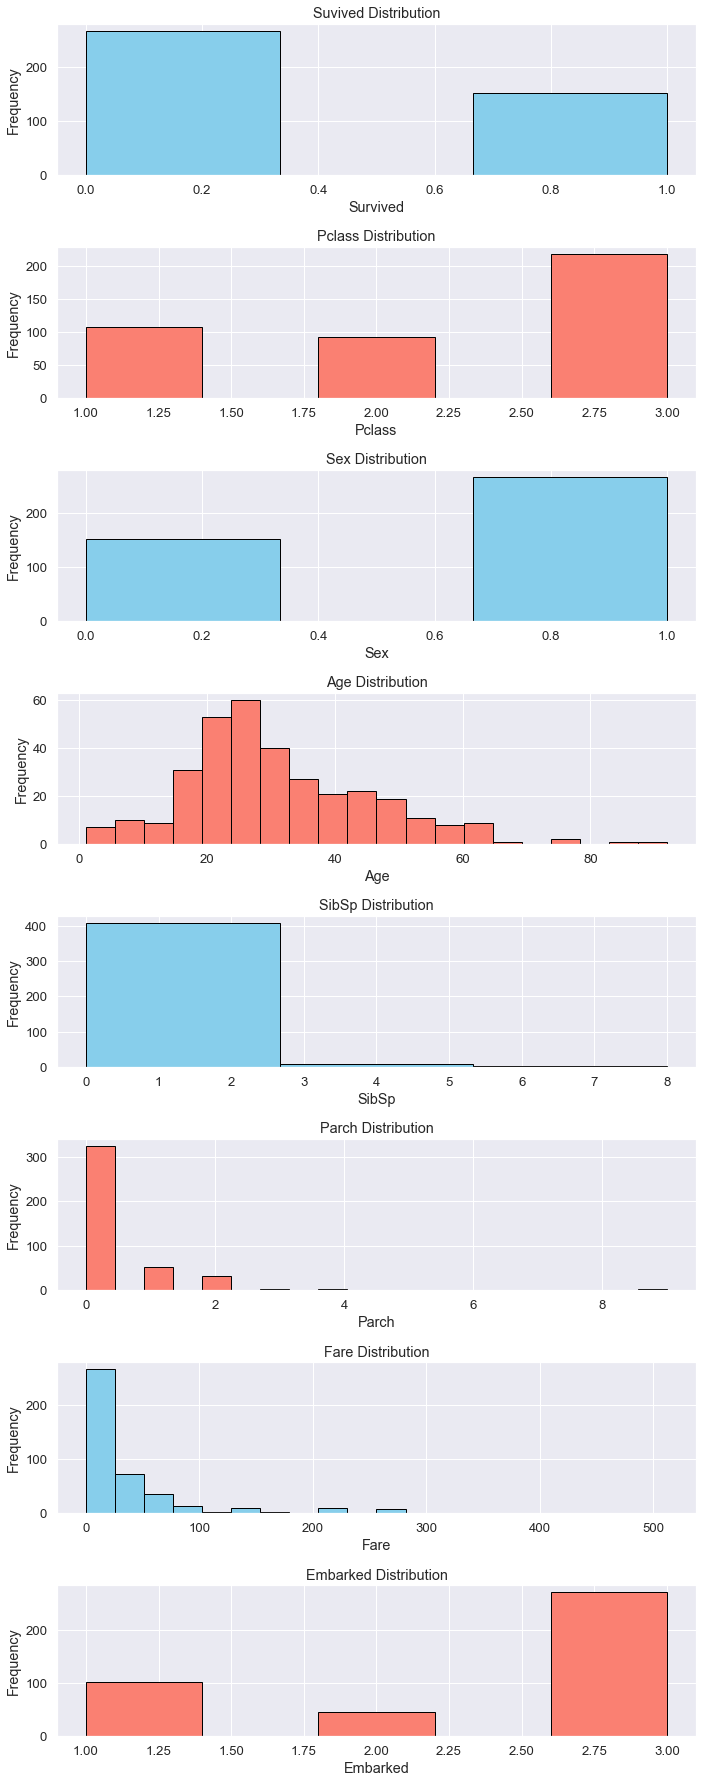

In [196]:
#now lets check outliers in data
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 25))

# Plot a histogram for 'Survived'
axes[0].hist(df['Survived'],bins=3, color='skyblue', edgecolor='black')
axes[0].set_title('Suvived Distribution')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Frequency')

# Plot a histogram for 'Pclass'
axes[1].hist(df['Pclass'], bins=5, color='salmon', edgecolor='black')
axes[1].set_title('Pclass Distribution')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Frequency')


# Plot a histogram for 'Sex'
axes[2].hist(df['Sex'], bins=3, color='skyblue', edgecolor='black')
axes[2].set_title('Sex Distribution')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Frequency')

#Plot a histogram for 'Age'
axes[3].hist(df['Age'], bins=20, color='salmon', edgecolor='black')
axes[3].set_title('Age Distribution')
axes[3].set_xlabel('Age')
axes[3].set_ylabel('Frequency')

# Plot a histogram for 'SibSp'
axes[4].hist(df['SibSp'], bins=3, color='skyblue', edgecolor='black')
axes[4].set_title('SibSp Distribution')
axes[4].set_xlabel('SibSp')
axes[4].set_ylabel('Frequency')

# Plot a histogram for 'Parch'
axes[5].hist(df['Parch'], bins=20, color='salmon', edgecolor='black')
axes[5].set_title('Parch Distribution')
axes[5].set_xlabel('Parch')
axes[5].set_ylabel('Frequency')

# Plot a histogram for 'Fare'
axes[6].hist(df['Fare'], bins=20, color='skyblue', edgecolor='black')
axes[6].set_title('Fare Distribution')
axes[6].set_xlabel('Fare')
axes[6].set_ylabel('Frequency')


# Plot a histogram for 'Embarked'
axes[7].hist(df['Embarked'], bins=5, color='salmon', edgecolor='black')
axes[7].set_title('Embarked Distribution')
axes[7].set_xlabel('Embarked')
axes[7].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

##### Lets visualize the data weather there is outliers or not

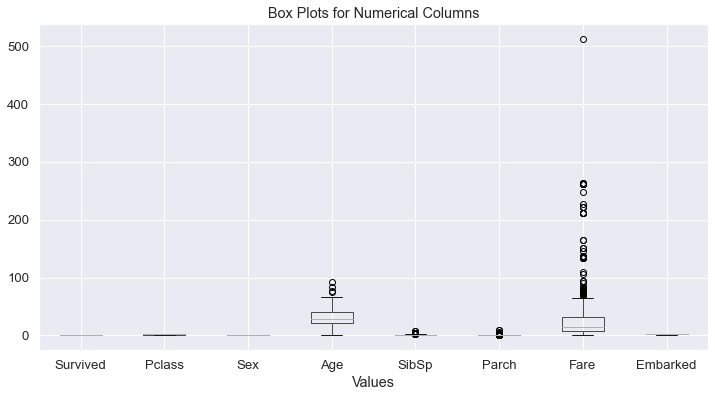

In [197]:
plt.figure(figsize=(12, 6))  # Set the figure size
df.boxplot()  # Create horizontal box plots for all numerical columns

# Set title and labels
plt.title("Box Plots for Numerical Columns")
plt.xlabel("Values")

# Show the plot
plt.show()

##### Know visualize Survived and other parameter relation as survived is the target 

1    50
2    30
3    72
Name: Pclass, dtype: int64


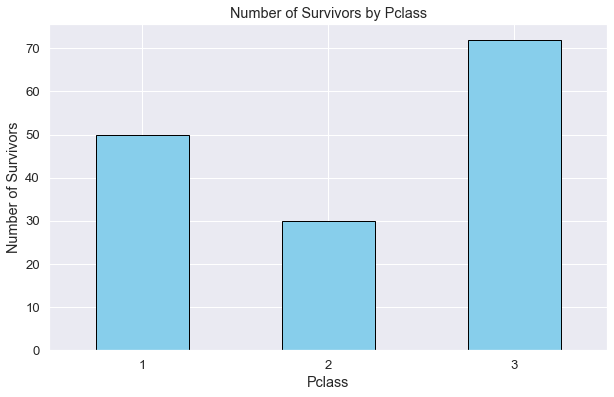

0    152
Name: Sex, dtype: int64


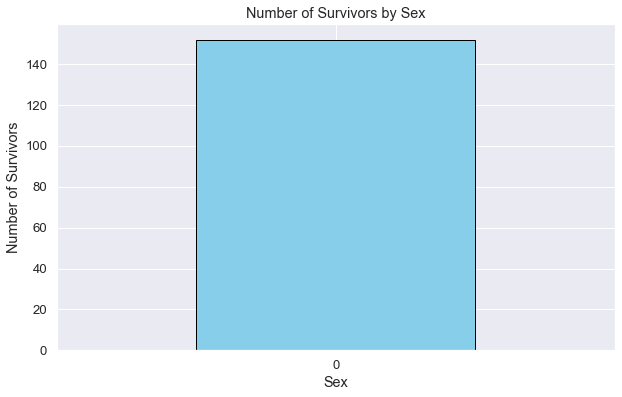

(0, 10]      8
(10, 20]    23
(20, 30]    45
(30, 40]    20
(40, 50]    15
(50, 60]    11
(60, 70]     3
(70, 80]     1
(80, 90]     0
Name: AgeGroup, dtype: int64


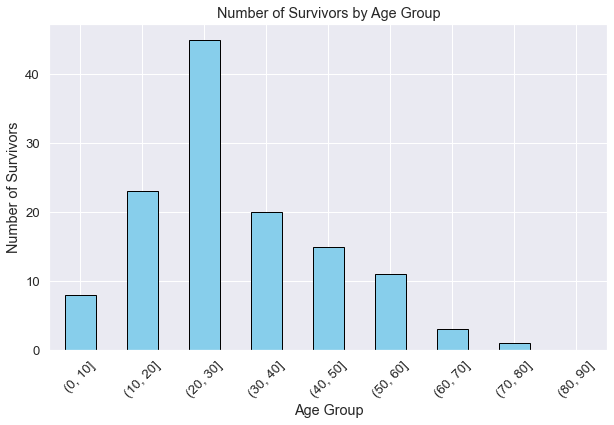

0    88
1    54
2     6
3     1
4     1
5     1
8     1
Name: SibSp, dtype: int64


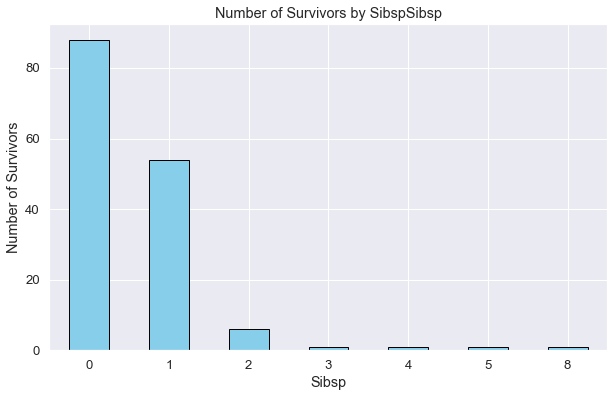

0    99
1    28
2    20
3     2
4     2
9     1
Name: Parch, dtype: int64


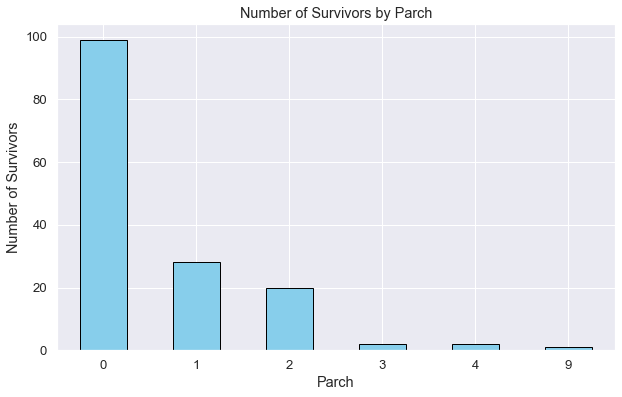

(0, 50]       109
(50, 100]      24
(100, 150]      5
(150, 200]      2
(200, 250]      6
(250, 300]      5
(300, 350]      0
(350, 400]      0
(400, 450]      0
(450, 500]      0
(500, 550]      1
Name: FareGroup, dtype: int64


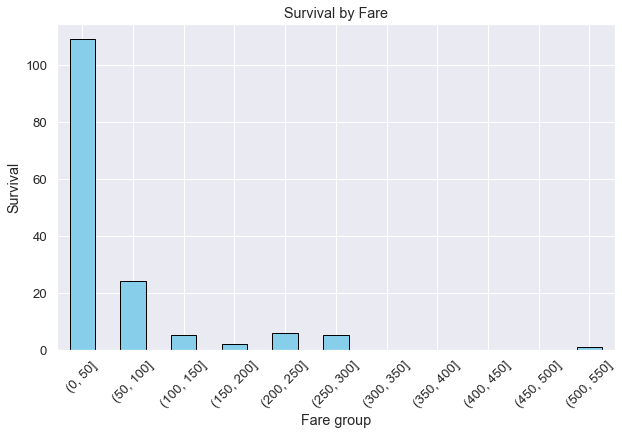

1    40
2    24
3    88
Name: Embarked, dtype: int64


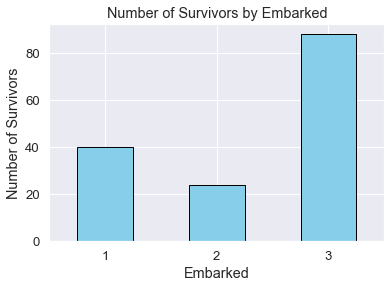

In [198]:
#                                 Visualize Number of survivor by Pclass

# Count the number of survivors in each Pclass group
Pclass_survivor_counts = df[df['Survived'] == 1]['Pclass'].value_counts().sort_index()
print(Pclass_survivor_counts)
#Create a bar chart to visualize the number of survivors by Pclass group
plt.figure(figsize=(10, 6))
Pclass_survivor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()


#                                 Visualize Number of survivor by Sex

# Count the number of survivors in each Sex
Sex_survivor_counts = df[df['Survived'] == 1]['Sex'].value_counts().sort_index()
print(Sex_survivor_counts)
#Create a bar chart to visualize the number of survivors by  Sex
plt.figure(figsize=(10, 6))
Sex_survivor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()


#                                 Visualize Number of survivor by Age

# Define the age bins or categories
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create a new column in the DataFrame to represent the age group
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Count the number of survivors in each age group
age_survivor_counts = df[df['Survived'] == 1]['AgeGroup'].value_counts().sort_index()
print(age_survivor_counts)
#Create a bar chart to visualize the number of survivors by age group
plt.figure(figsize=(10, 6))
age_survivor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=45)
plt.show()

#                                 Visualize Number of survivor by Sibsp

# Count the number of survivors in each Sibsp
Sibsp_survivor_counts = df[df['Survived'] == 1]['SibSp'].value_counts().sort_index()
print(Sibsp_survivor_counts)
#Create a bar chart to visualize the number of survivors by  SibspSibspSibsp
plt.figure(figsize=(10, 6))
Sibsp_survivor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Survivors by SibspSibsp')
plt.xlabel('Sibsp')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()

#                                 Visualize Number of survivor by Parch

# Count the number of survivors in each Sibsp
Parch_survivor_counts = df[df['Survived'] == 1]['Parch'].value_counts().sort_index()
print(Parch_survivor_counts)
#Create a bar chart to visualize the number of survivors by  Parch
plt.figure(figsize=(10, 6))
Parch_survivor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Survivors by Parch')
plt.xlabel('Parch')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()

#                                 Visualize Number of survivor by Fare

# Count the number of survivors by fare
fare_bins=[0,50,100,150,200,250,300,350,400,450,500,550]

df['FareGroup']=pd.cut(df['Fare'],bins=fare_bins)

fare_survivor_count=df[df['Survived']==1]['FareGroup'].value_counts().sort_index()
print(fare_survivor_count)
plt.figure(figsize=(10,6))
fare_survivor_count.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("Survival by Fare")
plt.xlabel("Fare group")
plt.ylabel("Survival")
plt.xticks(rotation=45)
plt.show()

#                                 Visualize Number of survivor by Embarked

# Count the number of survivors in each Embarked
Embarked_survivor_counts = df[df['Survived'] == 1]['Embarked'].value_counts().sort_index()
print(Embarked_survivor_counts)
#Create a bar chart to visualize the number of survivors by  SexEmbarked
Embarked_survivor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Survivors by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()


In [199]:
df['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)



##### Insights from Box Plot :

######    ------->  There is outliers in Fare feature lets handle 
    

##### Insights from survival rate against each feature :

######  -------> Pclass   :-  survival rate is high for Pclass 3
######    -------> Sex      :-  All female survived and there is no men survived
######    -------> Age      :-  Survival rate for age group between 10-40 year age is high 
######    -------> Sibsp    :-  The survival rate for 0 and 1 is high and very low for other
######    -------> Parch    :-  survival rate for Parch is high when parch is 0-2
######    -------> Fare     :-  Survival rate for Fare is high when Fare is low 
######   -------> Embarked :   Survival rate is high when Embarked is 3 



<div style="text-align:center">
<h1 style="color:black;">Step 3   :   Correlation Analysis</h1>
</div>


##### Lets find the correlation between features and Target

In [200]:
correlation_matrix=df.corr()
print(correlation_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.108615 -1.000000 -0.002434  0.099943  0.159120   
Pclass   -0.108615  1.000000  0.108615 -0.437814  0.001087  0.018721   
Sex      -1.000000  0.108615  1.000000  0.002434 -0.099943 -0.159120   
Age      -0.002434 -0.437814  0.002434  1.000000 -0.079655  0.022045   
SibSp     0.099943  0.001087 -0.099943 -0.079655  1.000000  0.306895   
Parch     0.159120  0.018721 -0.159120  0.022045  0.306895  1.000000   
Fare      0.191514 -0.577147 -0.191514  0.303766  0.171539  0.230046   
Embarked -0.076281  0.227983  0.076281 -0.130741  0.052708  0.054577   

              Fare  Embarked  
Survived  0.191514 -0.076281  
Pclass   -0.577147  0.227983  
Sex      -0.191514  0.076281  
Age       0.303766 -0.130741  
SibSp     0.171539  0.052708  
Parch     0.230046  0.054577  
Fare      1.000000 -0.257183  
Embarked -0.257183  1.000000  


In [201]:
correlation_matrix = df.corr()

correlation_with_survived = correlation_matrix['Survived']

sorted_correlation = correlation_with_survived.abs().sort_values(ascending=False)
print(sorted_correlation)

Survived    1.000000
Sex         1.000000
Fare        0.191514
Parch       0.159120
Pclass      0.108615
SibSp       0.099943
Embarked    0.076281
Age         0.002434
Name: Survived, dtype: float64


<div style="text-align:center">
<h1 style="color:black;">Step 4   :   Data Cleaning</h1>
</div>


### Handling missing   values

##### As there were alots of missing values is in Age which is 84 out 418 if we remove the empty cell then it will result in lose of data so the best approach is to fill it with mean values

In [202]:
# replace null values with mean of Age
df['Age'].isna().sum()
print(df['Age'].isna().sum())
age_mean=df['Age'].mean()
print(age_mean)

86
31.167168674698797


In [203]:
df['Age'].fillna(31,inplace=True)

##### There is one missing value in Fare now fill this using mean


In [204]:
null_fare_row=df[df['Fare'].isnull()]
print(null_fare_row)

     Survived  Pclass  Sex   Age  SibSp  Parch  Fare  Embarked  AgeGroup  \
152         0       3    1  60.5      0      0   NaN         3  (60, 70]   

    FareGroup  
152       NaN  


In [205]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

##### There many outliers in Fare column but if we change it this will effect the result one data point it too much out so let's remove it. 


In [206]:
df[df['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup
343,1,1,0,58.0,0,1,512.3292,1,"(50, 60]","(500, 550]"


In [207]:
df=df[df['Fare']<300]
df[df['Fare']>300]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup


(0, 50]       109
(50, 100]      24
(100, 150]      5
(150, 200]      2
(200, 250]      6
(250, 300]      5
Name: FareGroup, dtype: int64


[]

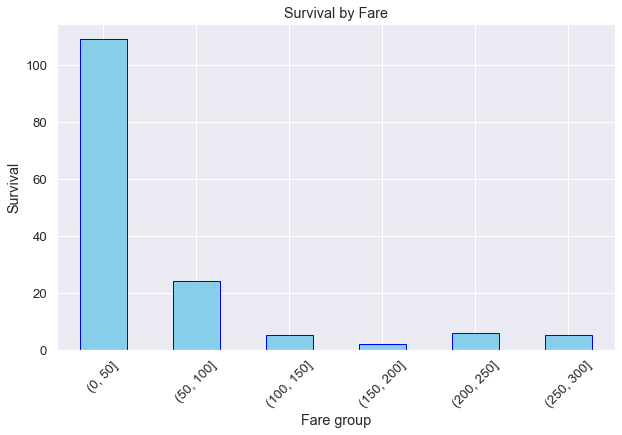

In [208]:
fare_bins=[0,50,100,150,200,250,300]

df['FareGroup']=pd.cut(df['Fare'],bins=fare_bins)

fare_survivor_count=df[df['Survived']==1]['FareGroup'].value_counts().sort_index()
print(fare_survivor_count)
plt.figure(figsize=(10,6))
fare_survivor_count.plot(kind='bar',color='skyblue',edgecolor='blue')
plt.title("Survival by Fare")
plt.xlabel("Fare group")
plt.ylabel("Survival")
plt.xticks(rotation=45)
plt.plot()


###### Removed the outlier with the value of 512 this was the only value which lied in 500-600 category and all other values lies in 0-300 

In [209]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.362110,2.268585,0.637890,31.068345,0.448441,0.390887,34.484018,2.405276
std,0.481188,0.840556,0.481188,12.967304,0.897568,0.982155,50.774851,0.852751
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,2.000000
50%,0.000000,3.000000,1.000000,31.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.500000,3.000000
max,1.000000,3.000000,1.000000,92.000000,8.000000,9.000000,263.000000,3.000000


In [210]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup
0,0,3,1,34.5,0,0,7.8292,2,"(30, 40]","(0, 50]"
1,1,3,0,47.0,1,0,7.0000,3,"(40, 50]","(0, 50]"
2,0,2,1,62.0,0,0,9.6875,2,"(60, 70]","(0, 50]"
3,0,3,1,27.0,0,0,8.6625,3,"(20, 30]","(0, 50]"
4,1,3,0,22.0,1,1,12.2875,3,"(20, 30]","(0, 50]"


In [211]:
df=df.drop(['AgeGroup','FareGroup'],axis=1)

###### Normalize the data to make all data in one scale

In [212]:

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df['Age']=scaler.fit_transform(df[['Age']])
df['Fare']=scaler.fit_transform(df[['Fare']])
df['Pclass']=scaler.fit_transform(df[['Pclass']])
df['Embarked']=scaler.fit_transform(df[['Embarked']])


In [213]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1,0.368132,0,0,0.029769,0.5
1,1,1.0,0,0.505495,1,0,0.026616,1.0
2,0,0.5,1,0.670330,0,0,0.036835,0.5
3,0,1.0,1,0.285714,0,0,0.032937,1.0
4,1,1.0,0,0.230769,1,1,0.046721,1.0


<div style="text-align:center">
<h2 style="color:black;">Step 5   :   Splitting Data
    </h2>
</div>


###### Split the data set into Dependent and independent variable

In [214]:

#spliting dependant and independant vairalbe
x=df.iloc[:,1:].values

y=df.iloc[:,:1].values

###### Split the data set into train and test dataset and will keep the ratio of 70:30 , 70 for training and 30 for testing

In [215]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train)

[[0.         0.         0.82417582 ... 0.         0.29980989 1.        ]
 [1.         1.         0.27472527 ... 0.         0.02995894 0.5       ]
 [0.5        1.         0.01098901 ... 1.         0.08745247 1.        ]
 ...
 [1.         0.         0.         ... 1.         0.0634981  1.        ]
 [1.         1.         0.32967033 ... 0.         0.02946768 0.5       ]
 [1.         1.         0.24175824 ... 0.         0.05285171 1.        ]]


In [216]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1,0.368132,0,0,0.029769,0.5
1,1,1.0,0,0.505495,1,0,0.026616,1.0
2,0,0.5,1,0.670330,0,0,0.036835,0.5
3,0,1.0,1,0.285714,0,0,0.032937,1.0
4,1,1.0,0,0.230769,1,1,0.046721,1.0


<div style="text-align:center">
<h2 style="color:black;">Step 6   :   Model Training
    </h2>
</div>


### Training multiple model to check which model perform well

## Logistic regression

In [217]:
LR_model= LogisticRegression()
LR_model.fit(x_train,y_train)

C:\pythoAnaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

<div style="text-align:center">
<h2 style="color:black;">Step 7   :   Model Assessment
    </h2>
</div>


In [218]:
Lr_y_pred=LR_model.predict(x_test)

In [219]:
print(classification_report(y_test,Lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        56

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



<div style="text-align:center">
<h2 style="color:black;">Step 8   :   Model Result Visualization
    </h2>
</div>


In [220]:
Lr_cm=confusion_matrix(y_test,Lr_y_pred)

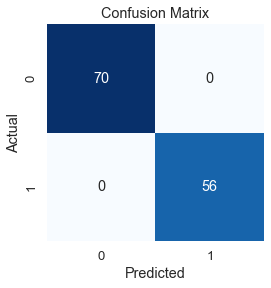

In [221]:
sns.set(font_scale=1.2)
sns.heatmap(Lr_cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="text-align:center">
<h2 style="color:black;">Result   :   Model is giving 100% accuracy
    </h2>
</div>


## Random Forest Classifier

C:\Users\Muhammad Ismail\AppData\Local\Temp\ipykernel_5188\100341695.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        56

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



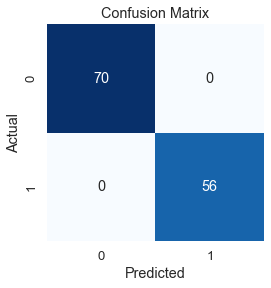

In [222]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

Rf_y_pred=rf_model.predict(x_test)

print(classification_report(y_test,Rf_y_pred))

Rf_cm=confusion_matrix(y_test,Rf_y_pred)

sns.set(font_scale=1.2)
sns.heatmap(Rf_cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.98      0.99        56

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



C:\pythoAnaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


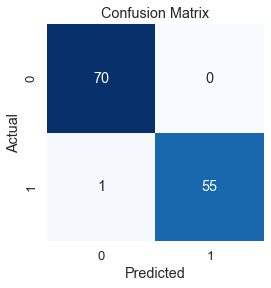

In [223]:
# Train the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)

# Predict with the trained model
svm_pred= svm_model.predict(x_test)
                            
print(classification_report(y_test,svm_pred))

svm_cm=confusion_matrix(y_test,svm_pred)

sns.set(font_scale=1.2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        56

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



C:\pythoAnaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


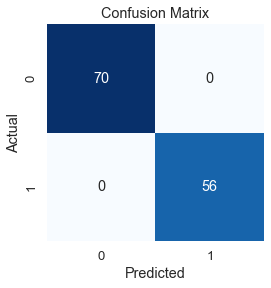

In [224]:
# Create a Gaussian Naive Bayes classifier
NB_model = GaussianNB()

# Train the classifier on the training data
NB_model.fit(x_train, y_train)

# Make predictions on the test data
NB_pred = NB_model.predict(x_test)

                            
print(classification_report(y_test,NB_pred))

NB_cm=confusion_matrix(y_test,NB_pred)

sns.set(font_scale=1.2)
sns.heatmap(NB_cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        56

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



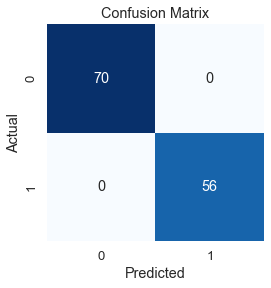

In [225]:
# Create a Decision Tree classifier
DT_model = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
DT_model.fit(x_train, y_train)

# Make predictions on the test data
DT_pred= DT_model.predict(x_test)

                            
print(classification_report(y_test,DT_pred))

DT_cm=confusion_matrix(y_test,DT_pred)

sns.set(font_scale=1.2)
sns.heatmap(DT_cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()